---

Applied Statistics

# Worksheet: Ames Housing Dataset 1 – Detect and Visualize Missing Data

---

### 1. Data Loading and Initial Analysis
The Ames Housing dataset is available on Moodle as AmesHousing.csv.

* Load the dataset into a pandas DataFrame.
*    Display the first few rows of the dataset to understand its structure.
*    Print the information about data types and missing values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
data = pd.read_csv('AmesHousing.csv')

data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

### 2. Identify Missing Data

*    Identify columns with missing data and calculate the percentage of missing values in each of these columns.
*    Create a bar plot to visualize the proportion of missing data for each column with missing values.
* Create a heat map to visualize the missing values.

In [4]:
# Identify missing data
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_percent = (missing_data / len(data)) * 100
print("Percentage of missing data by variable:")
print(missing_percent.sort_values(ascending=False))

Percentage of missing data by variable:
Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
BsmtFin SF 1       0.034130
Garage Cars        0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 2       0.034130
Electrical         0.034130
dtype: float64


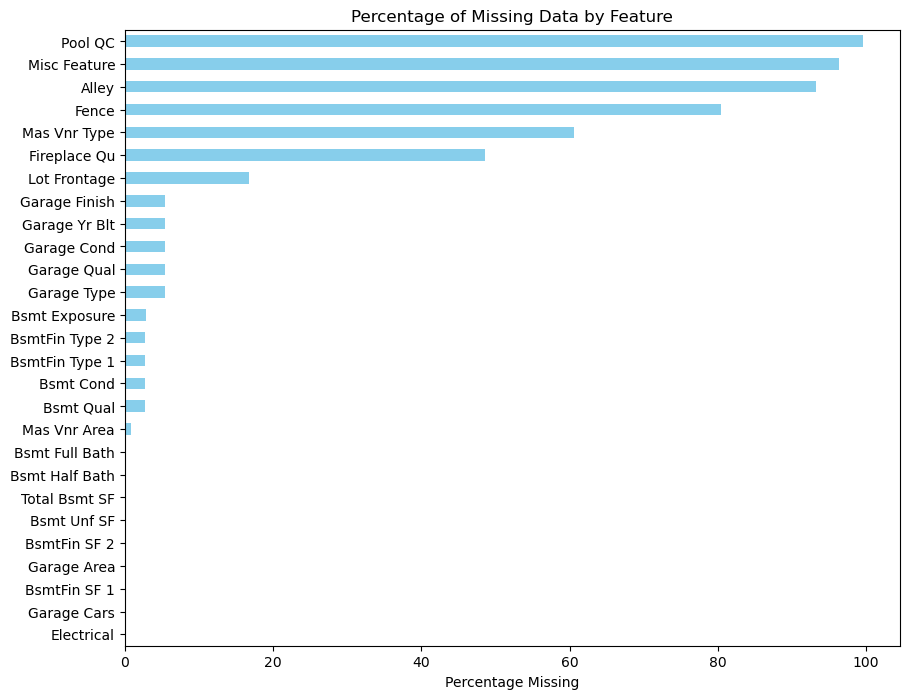

In [5]:
# Visualization of missing data
plt.figure(figsize=(10, 8))
missing_percent.sort_values().plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing Data by Feature')
plt.xlabel('Percentage Missing')
plt.show()

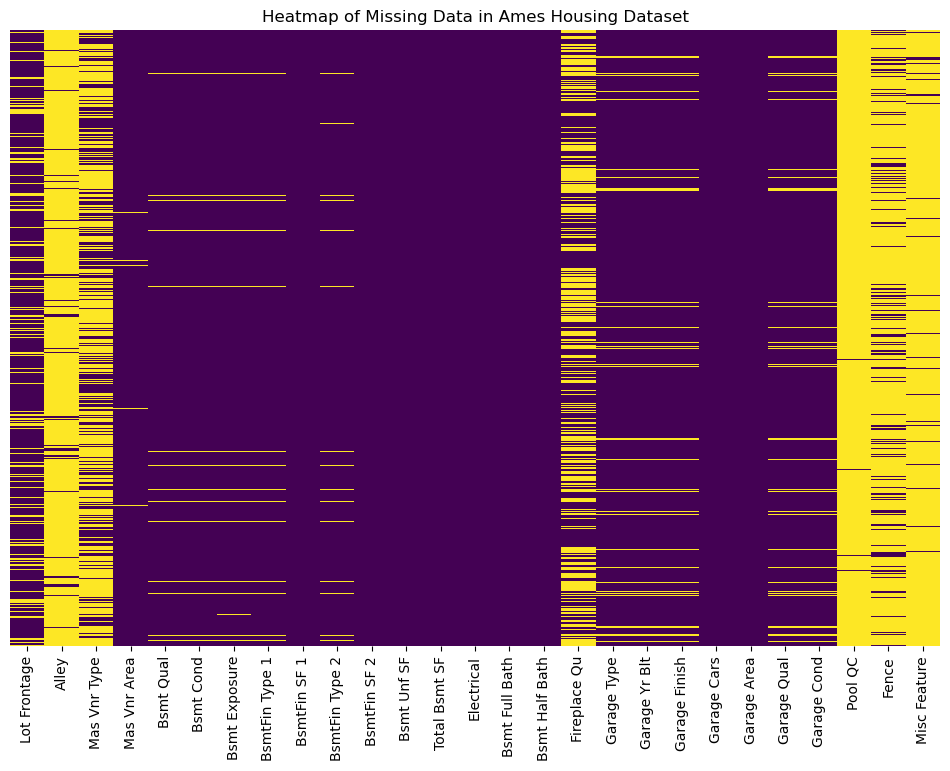

In [6]:
# Create a heatmap of missing data
# use only columns with missings
cols_with_missings = data.loc[:,missing_data.index]
plt.figure(figsize=(12, 8))
sns.heatmap(cols_with_missings.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data in Ames Housing Dataset')
plt.show()